# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import platform
import os

osname = platform.system()
%matplotlib inline

In [2]:
import torch

torch.cuda.is_available()

False

In [3]:
print(osname)

Darwin


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [4]:
if osname == 'Darwin':
    env = UnityEnvironment(file_name="Banana.app")
else:
    env = UnityEnvironment(file_name="Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

When finished, you can close the environment.

In [7]:
from agents import Agent
from models import Net
from compat import *
from memory import Memory

In [8]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def main_train(save_name,
              n_s=state_size,
              n_a=action_size,
              episode=50,
              hiddens=(128,64),
              epsilon=1.0,
              epsilon_min=0.0,
              epsilon_decay=0.995,
              gamma=0.99,
              batch_size=64,
              memory_capacity=3000,
              lr=0.001,
              is_dueling=True,
              is_prioritize=True,
              replace_iter=10,
              is_soft=False,
              tau=0.01,
              e=0.01,
              a=0.6,
              b=0.4,last_100=False):
    scores = []
    avg_score = []
    n_s = state_size
    n_a = action_size
    agent = Agent(n_s,
                  n_a,
                  hiddens=hiddens,
                  epsilon=epsilon,
                  epsilon_min=epsilon_min,
                  epsilon_decay=epsilon_decay,
                  gamma=gamma,
                  batch_size=batch_size,
                  memory_capacity=memory_capacity,
                  lr=lr,
                  is_dueling=is_dueling,
                  is_prioritize=is_prioritize,
                  replace_iter=replace_iter,
                  is_soft=is_soft,
                  tau=tau,
                  e=e,
                  a=a,
                  b=b)
    for e in tqdm(range(episode)):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize the score
        step = 0
        while True:
    #     while step < MAX_STEP:
            action = agent.act(state)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished

            agent.step(state, action, reward, next_state, done)

            score += reward                                # update the score
            if done:                                       # exit loop if episode finished
                break
            state = next_state                             # roll over the state to next time step
            step += 1


        scores.append(score)
        if last_100:
            if len(scores) < 100:
                avg = np.mean(scores)
            else:
                avg = np.mean(scores[-100:])
        else:
            avg = np.mean(scores)
        avg_score.append(avg)
    name = "model_{save_name}_{mean}".format(
        save_name=save_name,
        mean=avg
    )
    if not os.path.exists(name):
        os.mkdir(name)
    
    try:        
        plt.xlabel('episode')
        plt.ylabel('reward')
        plt.title('mean_reward')
        plt.plot(range(len(avg_score)), avg_score)
        plt.savefig('{name}/{name}.jpg'.format(name=name))
    except:
        print(scores)
    agent.save('{name}/{name}.pt'.format(
        name=name
    ))

### My understanding of DQN
1. DQN use two Neural Networks， one I called eval_net, other is target_net and a replay_buffer to store the memory
2. The target_net's weight data is not update in every episode, it is synced from eval_net every **C** step
3. Using replaybuffer can break the association between memories and the memory can reuse
4. The agent selects an action from **eval_net** using the **e-greedy** policy when interacting with the environment.
5. But when learning, agent use the **greedy** policy to get the expected reward for the next state from **target_net**.
6. It is the above characteristics that make DQN competent for more complex tasks.


### About Model
The algorithm I used this time is DoubleDQN.

The original DQN uses fix target and replaybuffer, while Double DQN avoids overestimation by selecting the action index of Eval net when updating values.

The overall algorithm flow is as follows:

1. Get the input state of the environment

2. Agent chooses actions through Eval net and e-greedy policies

3. Interacting with selected actions and environments

4. Environment returns to the next state and rewards

5. Store the current state, action, reward, and next state in the memory bank.

6. When the memory storage exceeds a certain amount, batch size memory is selected from the memory by random sampling for learning.

7. The update adopts double DQN algorithm. The target_value is the largest action index obtained from the next state in eval_net. The index is used to acquire specific Q values from target_net for learning, and the Q values of the current state obtained from eval_net for error calculation and reverse propagation.

8. The get Q_target formula is:
![Alt text](https://upload-images.jianshu.io/upload_images/4155986-fe9db451ace25e85.png)
9. The loss formula is :
![Alt text](https://upload-images.jianshu.io/upload_images/4155986-03f9734450028881)

  0%|          | 0/1800 [00:00<?, ?it/s]

Use CPU traning!


100%|██████████| 1800/1800 [38:46<00:00,  1.20s/it]


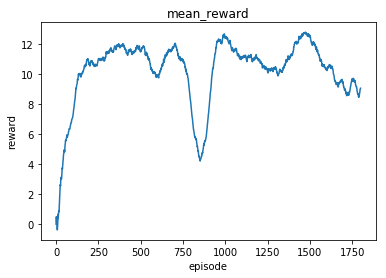

In [11]:
print('Use GPU training!' if use_gpu else 'Use CPU traning!')

try:            
    main_train('model',
          n_s=state_size,
          n_a=action_size,
          episode=1800,              # train 1800 episode
          hiddens=(128,64),          # 2 hidden layers
          epsilon=1.0,               # Initial epsilon
          epsilon_min=0.001,         # min epsilon
          epsilon_decay=0.99,        # every learn step epsilon decay rate
          gamma=0.99,                # discount
          batch_size=32,             # take memory from replay buffer mini-batch size
          memory_capacity=3000,      # replay buffer size
          lr=0.001,                  # learning rate
          is_dueling=False,          # not using dueling
          is_prioritize=False,       # not using prioritize replay buffer
          replace_iter=10,           # every 10 step, target_net sync weights from eval_net 
          is_soft=False,             # not soft_update, using tau update 1% weights
          tau=0.01,                  # unuse
          e=0.01,                    
          a=0.6,
          b=0.4,
          last_100=True)
except Exception as e:
    print(e)


In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### About Future
I have tried many combinations of hyperparameters, including dueling DQN and prioritized replaybuffer, but the training performance may not be ideal for some reasons. So if I have higher computational power, I will try to challenge directly accepting pixel input to learn model more comprehensively to try various architectures, including adjusting the number of hidden layers, the number of nodes, and so on. Learning rate, replaybuffer size and so on.

As well as trying to use these hyperparameters and Dueling DQN and PriritizeReplayBuffer, or even Rainbow algorithm directly.

### When I last submitted, because the parameters have not been tried a lot, the average reward can only be up to 8, this time I tried various combinations and selected the combination I think is the best. I hope this time I can pass the project.